<a href="https://colab.research.google.com/github/skksu/CS7357/blob/master/CS7357_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CSE 7357 PROJECT 1 KNN **

---

---





In [ ]:
#IMPORT REQUIRED PYTHON PACKAGES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import neighbors
from sklearn import datasets
from statistics import mode 

In [ ]:
#IMPORT TARIN SET, TEST SET & VALIDATION DATASETS
train = pd.read_csv("train_set.csv")
validation = pd.read_csv("validation_set.csv")
test = pd.read_csv("test_set.csv")
print(train.head(6))
print(validation.head(5))
print(test.head(5))

type(train)

                         Words (split by space) label
0             europe retain trophy with big win   joy
1               senate votes to revoke pensions   sad
2  the amounts you have to pay for a bomb scare  fear
3     pair of satellites will document sun in d   joy
4            malaysian airasia x to fly in july   joy
5                      dow hits new record eyes   joy
                              Words (split by space)     label
0     marijuana helps ease hiv nerve pain study says  surprise
1            thousands line up to get late flu shots      fear
2        king county offering some free flu vaccines       joy
3                 rig threat cargo ship towed ashore      fear
4  new zealand unlikely to allow crippled japanes...       sad
   textid                          Words (split by space)  label
0       1  senator carl krueger thinks ipods can kill you    NaN
1       2               who is prince frederic von anhalt    NaN
2       3                        prestige has mag

pandas.core.frame.DataFrame

# DATA EXPLORATION

In [ ]:
train.columns

Index(['Words (split by space)', 'label'], dtype='object')

In [ ]:
train.columns

Index(['Words (split by space)', 'label'], dtype='object')

In [ ]:
#CHECK THE SHAPE OF THE DATAFRAME
print(train.shape,validation.shape,test.shape)

(598, 2) (311, 2) (312, 3)


In [ ]:
#CHECK THE TRAIN DATA COLUMNS NAME
train.columns                           

Index(['Words (split by space)', 'label'], dtype='object')

In [ ]:
#CHECK THE DATA INDEX & DATATYPES
train.index
train.dtypes

Words (split by space)    object
label                     object
dtype: object

In [ ]:
#CHECK THE MISSING VALUES
train.isnull().sum()

Words (split by space)    0
label                     0
dtype: int64

In [ ]:
#CHECK THE TARGET COLUMNS COUNT
train['label'].value_counts()

joy         217
sad         124
surprise    108
fear         90
anger        40
disgust      19
Name: label, dtype: int64

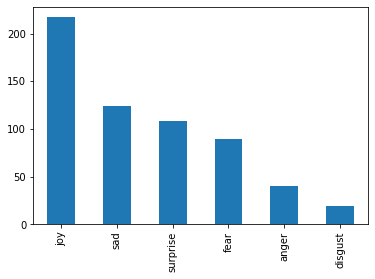

In [ ]:
#PLOT OF THE TARGET LABELS
train['label'].value_counts().plot.bar()
plt.show()

#DATA PREPROCESSING 

In [ ]:
print(train.columns,validation.columns,test.columns)

Index(['Words (split by space)', 'label'], dtype='object') Index(['Words (split by space)', 'label'], dtype='object') Index(['textid', 'Words (split by space)', 'label'], dtype='object')


In [ ]:
#RENAME COLUMN NAME 'Words (split by space)' OF ALL 3 DATASETS
train.rename(columns = {'Words (split by space)':'Words'}, inplace = True)
test.rename(columns = {'Words (split by space)':'Words'}, inplace = True)
validation.rename(columns = {'Words (split by space)':'Words'}, inplace = True)

In [ ]:
#SEPARATE TARGET VARIABLE 
train_y = train.drop(['Words'],axis = 1)
validation_y = validation.drop(['Words'],axis = 1)
y = validation_y.values.tolist()
y[0]

['surprise']

In [ ]:
#CREATE VOCABUALRY FROM TRAIN,TEST & VALIDATION DATASET
type(train['Words'])
tex = train['Words'].values
#text = tex.to_string()
train_text = train['Words'].tolist()
validation_text = validation['Words'].tolist()
test_text = test['Words'].tolist()
Text = (train_text + validation_text + test_text)
print(Text)

#BUILD INDEPENDENT VOCABULARY 
vocab = [word for line in Text for word in line.split()]
print(vocab)
type(vocab)

#BUILD NON-REPETITIVE VOCABULARY 
Nonrep_Vocab = list(sorted(set(vocab)))
Nonrep_Vocab
print(len(Nonrep_Vocab), Nonrep_Vocab)
#print(len(Nonrep_Vocab), Nonrep_Vocab)

['europe retain trophy with big win', 'senate votes to revoke pensions', 'the amounts you have to pay for a bomb scare', 'pair of satellites will document sun in d', 'malaysian airasia x to fly in july', 'dow hits new record eyes', 'bathing mom awakes to find baby dead', 'we re a pretty kind bully', 'women in their s are perfectly good mothers', 'hands on doomsday clock move forward', 'italy to hold no show trial of bronx gi in iraq slay', 'what the godfather of soul meant to me', 'snow begins heavy accumulations expected', 'millionaire secret santa dies', 'martian life could have evaded detection by viking landers', 'gunman was srebrenica survivor', 'world tourism sets record in', 'earthlink ceo dies at age', 'goal delight for sheva', 'late penalty costs roma the points', 'house of cards actor ian richardson dead', 'even before its release world climate report is criticized as too optimistic', 'mln birds to be vaccinated from bird flu near moscow', 'speaker hastert testifies before pa

In [ ]:
#TEXT ENCODING FUNCTION
def binary_transform(text):
    # create a vector with all entries as 0
    output = np.zeros(len(Nonrep_Vocab))
    # tokenize the input
    words = set(text.split())
    # for every word in vocab check if the doc contains it
    for i, v in enumerate(Nonrep_Vocab):
        output[i] = v in words
    return output

In [ ]:
#TRAIN TEXT ENCODING
import numpy 
trainX = []
for j in train['Words'].values[:598]:
   # print(j)
    train_x = (binary_transform(j))
    train_x = train_x.astype(int).tolist()
    trainX.append(train_x)
    #print(train1)
X0 = trainX[0]
X1 = trainX[1]
print(trainX[0])
    

print(type(train_x),len(train_x),X0.count(1),X1.count(1),type(X1))

#CONVERTING LIST TO DATAFRAME

train_X = pd .DataFrame(trainX)
print(train_X)
print(train_X.iloc[[0]])
print(trainX[0])
print(train_X[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
#VALIDATION TEXT ENCODING
import numpy 
validationX = []
for j in validation['Words'].values[:598]:
   # print(j)
    validation_x = (binary_transform(j))
    validation_x = validation_x.astype(int).tolist()
    validationX.append(validation_x)
    #print(train1)
X0v = validationX[0]
X1v = validationX[1]
print(validationX[0])
    

print(type(validation_x),len(validation_x),X0v.count(1),X1v.count(1),type(X1v))

#CONVERTING LIST TO DATAFRAME

validation_X = pd .DataFrame(validationX)
print(validation_X)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
#TEST TEXT ENCODING
import numpy 
testX = []
for j in test['Words'].values[:598]:
   # print(j)
    test_x = (binary_transform(j))
    test_x = test_x.astype(int).tolist()
    testX.append(test_x)
    #print(train1)
X0t = testX[0]
X1t = testX[1]
print(testX[0])
    

print(type(test_x),len(test_x),X0t.count(1),X1t.count(1),type(X1t))

#CONVERTING LIST TO DATAFRAME

test_X = pd .DataFrame(testX)
print(test_X)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
#ASSIGNING BINARY CODE TO TRAIN  LABEL COLUMN
def binlabel(train):
  train_y = train.drop(['Words'],axis = 1)
  train_y = pd.get_dummies(data=train_y,columns=['label'])
  print(train_y.columns)
  type(train_y.values)
  train_Y = train_y.values
  print(train_Y.shape,type(train_Y))
  #print(train_Y)
  return train_Y

train_Y = binlabel(train)
train_Y

Index(['label_anger', 'label_disgust', 'label_fear', 'label_joy', 'label_sad',
       'label_surprise'],
      dtype='object')
(598, 6) <class 'numpy.ndarray'>


array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [ ]:
#VALIDATION LABEL ENCODING
validation_Y = binlabel(validation)
validation_Y

Index(['label_anger', 'label_disgust', 'label_fear', 'label_joy', 'label_sad',
       'label_surprise'],
      dtype='object')
(311, 6) <class 'numpy.ndarray'>


array([[0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=uint8)



---



MANHATTAN DISTANCE TO DETERMINE K VALUE 

In [ ]:
# Calculate Manhattan distance between two points


def manhattan_distance(a, b):
    
     # Store the number of dimensions
    dim = len(a)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(a[d] - b[d])
        
    distance = distance
    
    return distance


#TEST THE FUNCTION BY CALCULATING DISTANCE BETWEEN TRAIN DATA SAMPLE 1ST & 2ND 

distance = manhattan_distance(a=train_X.iloc[0], b=train_X.iloc[1])



#FOR ALL REMAINING TRAINING VECTORS
a = trainX[0]
for row in train_X.index:
	distance = manhattan_distance(a, train_X.iloc[row])
	print(distance)

0
11
16
14
13
11
13
12
14
12
18
14
11
10
15
10
11
11
10
12
13
18
16
14
12
12
10
13
14
13
11
13
14
11
11
17
13
13
11
19
13
15
14
12
11
10
11
13
10
9
13
13
12
13
13
12
11
13
11
11
15
13
11
11
11
15
9
10
14
10
10
14
12
10
16
13
13
12
11
13
14
11
14
11
13
11
15
12
12
11
12
12
11
15
12
13
13
16
11
12
13
12
12
11
11
12
17
10
12
11
16
13
14
11
12
15
11
10
14
13
11
6
12
12
10
11
11
11
15
17
14
14
14
12
10
12
14
10
12
11
11
11
16
12
16
12
11
11
10
16
16
13
11
10
9
13
10
12
11
11
15
14
13
14
14
10
14
11
12
14
11
13
11
12
14
13
13
12
11
13
12
9
12
12
11
12
13
13
9
14
14
13
12
17
13
14
10
11
12
8
16
13
12
14
14
11
14
14
11
11
15
12
12
16
19
13
12
12
14
12
14
9
18
12
12
13
16
10
13
10
12
14
12
12
12
15
11
12
9
13
12
15
12
13
14
13
13
10
12
14
12
12
12
12
16
15
13
12
12
12
12
12
16
12
14
13
10
13
17
11
11
12
15
13
14
20
13
14
13
13
12
14
13
13
12
13
13
12
13
11
11
11
10
13
16
13
13
11
14
16
12
14
12
17
11
14
15
13
10
13
12
15
11
12
16
14
10
12
11
11
14
12
14
12
15
13
12
14
13
12
11
12
13
10
13
13
13

In [ ]:
# Find the 5 nearest neighbors

df_dists = pd.DataFrame(data=distance, index=train_X.index, columns=['dist'])
df_dists.head()

df_nn = df_dists.sort_values(by=['dist'], axis=0)[:9]
df_nn

,dist
0,13
395,13
396,13
397,13
398,13
399,13
400,13
394,13
401,13


In [ ]:
# Create counter object to track the labels
counter = train_y.iloc[df_nn.index]
print(counter, type(counter))

# Get most common label of all the nearest neighbors

target = counter.label.mode()
print(target)

#TRAIN TARGET
train_y.values.tolist()[0]

        label
0         joy
395       joy
396     anger
397  surprise
398  surprise
399       joy
400       joy
394  surprise
401       sad <class 'pandas.core.frame.DataFrame'>
0    joy
dtype: object


['joy']



---



In [ ]:
# Calculate distance between Validation vector and all points in train vector X

distances = []

for i in train_X.index:
    
    distances.append(manhattan_distance(validationX[0], trainX[i]))
    
df_dists = pd.DataFrame(data=distances, index=train_X.index, columns=['dist'])
df_dists.head()

,dist
0,14
1,13
2,18
3,16
4,15


In [ ]:
#LAST 5 ROWS OUTPUT
df_dists.tail()

,dist
593,13
594,15
595,13
596,12
597,15


In [ ]:
# FIND THE 5 NEAREST NEIGHBOURS 

df_nn = df_dists.sort_values(by=['dist'], axis=0)[:9]
df_nn

,dist
199,10
290,11
424,11
536,11
181,11
221,11
205,11
66,11
33,11


In [ ]:
#GET THE INDEX OF CALCULATED DISTANCE
df_nn.index

Int64Index([199, 290, 424, 536, 181, 221, 205, 66, 33], dtype='int64')

In [ ]:
print(train_y.iloc[199],train_y.iloc[[199]])

label    fear
Name: 199, dtype: object     label
199  fear


In [ ]:
# Create counter object to track the labels
counter = train_y.iloc[df_nn.index]
print(counter, type(counter))

# Get most common label of all the nearest neighbors

target = counter.label.mode()
print(target)
#for i in target:
#  print(i)
#print(list(target))

#VALUE OF VALIDATION TARGET
validation_y.values.tolist()[0]

        label
199      fear
290      fear
424   disgust
536       joy
181      fear
221      fear
205  surprise
66        joy
33        sad <class 'pandas.core.frame.DataFrame'>
0    fear
dtype: object


['surprise']

In [ ]:
##CALCULATE DISTANCE BETWEEN TRAIN DATA SAMPLES  & VALIDATION DATA SAMPLES
X_train = train_X.values
X_validation = validation_X.values
X_test = test_X.values
type(X_train)

def knn_predict_manhattan(X_train, X_validation, y_train, k):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for testpoint in X_validation:
        distances = []

        for trainpoint in X_train:
            distance = manhattan_distance(testpoint, trainpoint)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=train_y.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = train_y.iloc[df_nn.index]

        # Get most common label of all the nearest neighbors
        prediction = counter.label.mode()
        #for i in prediction:
         #    print(list(i))
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test


# Make predictions on validation dataset
y_hat_test = knn_predict_manhattan(X_train, X_validation, train_y, k=15)

print(distance)
print(y_hat_test)

13
[0    joy
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    fear
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    fear
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    fear
1     joy
2     sad
dtype: object, 0    sad
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    fear
dtype: object, 0    joy
dtype: object, 0    fear
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    fear
dtype: object, 0    fear
dtype: object, 0    fear
dtype: object, 0    fear
1     sad
dtype: object, 0    joy
dtype: object, 0    sad
dtype: object, 0    fear
dtype: object, 0    joy
dtype: object, 0    sad
dtype: object, 0    joy
1    sad
dtype: object, 0    joy
dtype: object, 0    fear
1     sad
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    fear
dtype: object,

In [ ]:
#PREDICT VALIDATION LABEL & ACCURACY BY CHECKING ON DIFFERENT K VALUE
#Get the list of actual validation label
y = validation_y.values.tolist()
print(y)

#Get the list of predicted validation label
yp = [x.values.tolist() for x in y_hat_test]
print(yp)

#Zip actual validation label & predicted validation label
z = list(zip(yp,y))
z[0][0]
print(z)

#Match actual validation list & predicted validation list
bcc = []
for yp, y in z:
   if (yp == y) :
    r = "yes"
    bcc.append(y)
   else:
    r = "No"
print(bcc)
len(bcc)

#Calculate Accuracy 
accuracy = (len(bcc)/311)*100
accuracy

[['surprise'], ['fear'], ['joy'], ['fear'], ['sad'], ['joy'], ['fear'], ['joy'], ['surprise'], ['fear'], ['surprise'], ['sad'], ['sad'], ['sad'], ['surprise'], ['joy'], ['joy'], ['joy'], ['fear'], ['sad'], ['disgust'], ['surprise'], ['sad'], ['sad'], ['joy'], ['surprise'], ['sad'], ['joy'], ['sad'], ['fear'], ['sad'], ['sad'], ['fear'], ['anger'], ['fear'], ['surprise'], ['joy'], ['joy'], ['sad'], ['surprise'], ['surprise'], ['joy'], ['sad'], ['sad'], ['joy'], ['fear'], ['sad'], ['surprise'], ['sad'], ['fear'], ['joy'], ['joy'], ['fear'], ['sad'], ['joy'], ['disgust'], ['joy'], ['anger'], ['fear'], ['disgust'], ['joy'], ['surprise'], ['joy'], ['surprise'], ['surprise'], ['joy'], ['joy'], ['sad'], ['fear'], ['joy'], ['surprise'], ['sad'], ['sad'], ['joy'], ['joy'], ['fear'], ['fear'], ['surprise'], ['joy'], ['sad'], ['sad'], ['joy'], ['surprise'], ['joy'], ['disgust'], ['fear'], ['sad'], ['sad'], ['joy'], ['sad'], ['joy'], ['surprise'], ['anger'], ['joy'], ['disgust'], ['joy'], ['joy'],

36.33440514469453

DETERMINE DISTANCE BETWEEN TRAIN DATA SAMPLES

---



In [ ]:
#CALCULATE DISTANCE BETWEEN TRAINING DATA SAMPLES USING MANHATTAN DISTANCE  
#TRAIN LABEL PREDICTION
train_yp = knn_predict_manhattan(X_train, X_train, train_y, k=7)
train_yp

[0    joy
 dtype: object, 0    joy
 dtype: object, 0    fear
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    fear
 1     joy
 dtype: object, 0    joy
 dtype: object, 0    fear
 dtype: object, 0    fear
 dtype: object, 0    joy
 dtype: object, 0    fear
 dtype: object, 0    sad
 dtype: object, 0        fear
 1         joy
 2    surprise
 dtype: object, 0        fear
 1         joy
 2    surprise
 dtype: object, 0    joy
 dtype: object, 0    joy
 1    sad
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    fear
 dtype: object, 0    joy
 dtype: object, 0    disgust
 1       fear
 2        joy
 dtype: object, 0    fear
 1     joy
 2     sad
 dtype: object, 0    anger
 dtype: object, 0    fear
 dtype: object, 0    fear
 dtype: object, 0    anger
 1      joy
 dtype: object, 0    joy
 dtype: object, 0    fear
 dtype: object, 0    fear
 dtype: object, 0    fear
 dtype: object, 0

In [ ]:
#PREDICT TRAIN LABEL & TRAINING ACCURACY
#Get the list of actual train label
y = train_y.values.tolist()
print(y)

#Get the list of predicted validation label
yp = [x.values.tolist() for x in train_yp]
print(yp)

#Zip actual validation label & predicted validation label
z = list(zip(yp,y))
z[0][0]
print(z)

#Match actual validation list & predicted validation list
bcc = []
for yp, y in z:
   if (yp == y):
    r = "yes"
    bcc.append(yp)
   else:
    r = "No"
print(bcc)
len(bcc)

#Calculate Accuracy 
accuracy = (len(bcc)/598)*100
accuracy

[['joy'], ['sad'], ['fear'], ['joy'], ['joy'], ['joy'], ['sad'], ['joy'], ['sad'], ['fear'], ['anger'], ['joy'], ['fear'], ['sad'], ['surprise'], ['surprise'], ['joy'], ['sad'], ['joy'], ['sad'], ['sad'], ['fear'], ['joy'], ['disgust'], ['sad'], ['anger'], ['sad'], ['fear'], ['surprise'], ['joy'], ['fear'], ['fear'], ['sad'], ['sad'], ['joy'], ['surprise'], ['joy'], ['surprise'], ['joy'], ['joy'], ['joy'], ['anger'], ['joy'], ['joy'], ['surprise'], ['disgust'], ['joy'], ['sad'], ['joy'], ['surprise'], ['fear'], ['sad'], ['fear'], ['joy'], ['surprise'], ['joy'], ['sad'], ['sad'], ['joy'], ['joy'], ['anger'], ['joy'], ['surprise'], ['fear'], ['joy'], ['fear'], ['joy'], ['joy'], ['surprise'], ['joy'], ['joy'], ['surprise'], ['surprise'], ['surprise'], ['fear'], ['fear'], ['anger'], ['joy'], ['joy'], ['sad'], ['sad'], ['sad'], ['sad'], ['sad'], ['surprise'], ['joy'], ['joy'], ['joy'], ['surprise'], ['joy'], ['joy'], ['surprise'], ['joy'], ['anger'], ['anger'], ['joy'], ['surprise'], ['surp

44.98327759197324


*K Value : 5, Training Accuracy : 42.8%*

*K value : 7, Training Accuracy : 44.9%*

*K Value : 9, Training Accuracy : 42.6%*

*K Value : 11, Training Accuracy : 43%*

*K Value : 15, Training Accuracy : 42.1%*



In [ ]:
# PREDICT TEST SET LABEL USING MANHATTAN DISTANCE 
test_y = knn_predict_manhattan(X_train, X_test, train_y, k=15)
test_y

[0    joy
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    sad
 dtype: object, 0    fear
 dtype: object, 0    fear
 dtype: object, 0         joy
 1    surprise
 dtype: object, 0    sad
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    fear
 dtype: object, 0    fear
 1     joy
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    fear
 1     joy
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    fear
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    fear
 1     joy
 2     sad
 dtype: object, 0    fear
 dtype: object, 0    joy
 dtype: object, 0    joy
 dtype: object, 0    fear
 1     sad
 dtype

In [ ]:
#PREDICTED TEST LABEL
test_y = [x.values.tolist() for x in test_y]
print(test_y)

[['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['sad'], ['fear'], ['fear'], ['joy', 'surprise'], ['sad'], ['joy'], ['joy'], ['joy'], ['joy'], ['fear'], ['fear', 'joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['fear', 'joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['fear'], ['joy'], ['joy'], ['joy'], ['joy'], ['fear', 'joy', 'sad'], ['fear'], ['joy'], ['joy'], ['fear', 'sad'], ['joy'], ['joy'], ['fear', 'joy'], ['joy'], ['fear'], ['joy'], ['fear', 'joy'], ['joy'], ['fear', 'joy'], ['joy'], ['fear'], ['joy'], ['fear', 'joy'], ['joy', 'sad'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['fear'], ['joy'], ['joy'], ['fear', 'joy'], ['fear'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['fear', 'joy'], ['joy'], ['joy'], ['joy'], ['fear', 'joy'], ['sad'], ['joy'], ['sad'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['fear'], ['joy'], ['joy'], ['joy'], ['

In [ ]:
#COMBINED TEST DATASET WITH LABEL 
test_text = test['Words'].tolist()
test_list = list(zip(test_text,test_y))
test_list

[('senator carl krueger thinks ipods can kill you', ['joy']),
 ('who is prince frederic von anhalt', ['joy']),
 ('prestige has magic touch', ['joy']),
 ('study female seals picky about mates', ['joy']),
 ('no e book for harry potter vii', ['joy']),
 ('blair apologises over friendly fire inquest', ['sad']),
 ('vegetables may boost brain power in older adults', ['fear']),
 ('afghan forces retake town that was overrun by taliban', ['fear']),
 ('skip the showers male sweat turns women on study says',
  ['joy', 'surprise']),
 ('made in china irks some burberry shoppers', ['sad']),
 ('britain to restrict immigrants from new eu members', ['joy']),
 ('canadian breakthrough offers hope on autism', ['joy']),
 ('russia to strengthen its military muscle', ['joy']),
 ('alzheimer s drugs offer no help study finds', ['joy']),
 ('uk police slammed over terror raid', ['fear']),
 ('no rejects police state claim', ['fear', 'joy']),
 ('oprah announces new book club pick', ['joy']),
 ('smith can t be burie

TEST DATASET LABEL

In [ ]:
#TEST SET OUTPUT
data = {'Words (Split by Space)':test_text, 'Label':test_y}

testoutput = pd.DataFrame(data, columns = ['Words (Split by Space)','Label'])
testout = testoutput.head(8)
type(testout.Label)


pandas.core.series.Series

In [ ]:
#TEST OUTPUT WITH LABEL
testout['Label'] = testout['Label'].str.join(', ')
testout

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Words (Split by Space),Label
0,senator carl krueger thinks ipods can kill you,joy
1,who is prince frederic von anhalt,joy
2,prestige has magic touch,joy
3,study female seals picky about mates,joy
4,no e book for harry potter vii,joy
5,blair apologises over friendly fire inquest,sad
6,vegetables may boost brain power in older adults,fear
7,afghan forces retake town that was overrun by ...,fear


In [ ]:
#EXPORTED TEST DATA WITH LABEL TO MY RESULT CSV FILE 
testout.to_csv('my_result.csv')


**BEST K VALUE:** 15     , 
**ACCURACY:** 36.3%



---



EUCLIDEAN DISTANCE TO DETERMINE BEST K VALUE 

In [ ]:
#USING FUNCTION 
X_train = train_X.values
X_validation = validation_X.values
X_test = test_X.values
type(X_train)

numpy.ndarray

In [ ]:
# Calculate Euclidean distance between two points
from math import sqrt

def euclidean_distance(a, b):
    
     # Store the number of dimensions
    dim = len(a)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate euclidean distance using parameter p
    for d in range(dim):
        distance += (a[d] - b[d])**2
            
    return sqrt(distance)


#FOR ALL REMAINING VECTORS
a = trainX[0]
for row in train_X.index:
	distance = euclidean_distance(a, train_X.iloc[row])
	print(distance)

0.0
3.3166247903554
4.0
3.7416573867739413
3.605551275463989
3.3166247903554
3.605551275463989
3.4641016151377544
3.7416573867739413
3.4641016151377544
4.242640687119285
3.7416573867739413
3.3166247903554
3.1622776601683795
3.872983346207417
3.1622776601683795
3.3166247903554
3.3166247903554
3.1622776601683795
3.4641016151377544
3.605551275463989
4.242640687119285
4.0
3.7416573867739413
3.4641016151377544
3.4641016151377544
3.1622776601683795
3.605551275463989
3.7416573867739413
3.605551275463989
3.3166247903554
3.605551275463989
3.7416573867739413
3.3166247903554
3.3166247903554
4.123105625617661
3.605551275463989
3.605551275463989
3.3166247903554
4.358898943540674
3.605551275463989
3.872983346207417
3.7416573867739413
3.4641016151377544
3.3166247903554
3.1622776601683795
3.3166247903554
3.605551275463989
3.1622776601683795
3.0
3.605551275463989
3.605551275463989
3.4641016151377544
3.605551275463989
3.605551275463989
3.4641016151377544
3.3166247903554
3.605551275463989
3.3166247903554

In [ ]:

def knn_predict_euclidean(X_train, X_validation, y_train, k):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for testpoint in X_validation:
        distances = []

        for trainpoint in X_train:
            distance = euclidean_distance(testpoint, trainpoint)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=train_y.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = train_y.iloc[df_nn.index]

        # Get most common label of all the nearest neighbors
        prediction = counter.label.mode()
        #for i in prediction:
         #    print(list(i))
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test


# Make predictions on validation dataset
y_hat_test = knn_predict_euclidean(X_train, X_validation, train_y, k=15)

print(y_hat_test)

[0    joy
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    fear
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    fear
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    fear
1     joy
2     sad
dtype: object, 0    sad
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    fear
dtype: object, 0    joy
dtype: object, 0    fear
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    fear
dtype: object, 0    fear
dtype: object, 0    fear
dtype: object, 0    fear
1     sad
dtype: object, 0    joy
dtype: object, 0    sad
dtype: object, 0    fear
dtype: object, 0    joy
dtype: object, 0    sad
dtype: object, 0    joy
1    sad
dtype: object, 0    joy
dtype: object, 0    fear
1     sad
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    joy
dtype: object, 0    fear
dtype: object, 0 

In [ ]:
#PREDICT VALIDATION LABEL & ACCURACY

y = validation_y.values.tolist()
print(y)

a = [x.values.tolist() for x in y_hat_test]
print(a)

z = list(zip(a,y))
print(z)

#print(bcc)
print(z[0][0])

bcc = []
for x, y in z:
   if (x == y):
    print("yes")
    bcc.append(x)
   else:
    print("No")
print(bcc)
len(bcc)

#CALCULATE ACCURACY 

accuracy = (len(bcc)/311)*100
accuracy

[['surprise'], ['fear'], ['joy'], ['fear'], ['sad'], ['joy'], ['fear'], ['joy'], ['surprise'], ['fear'], ['surprise'], ['sad'], ['sad'], ['sad'], ['surprise'], ['joy'], ['joy'], ['joy'], ['fear'], ['sad'], ['disgust'], ['surprise'], ['sad'], ['sad'], ['joy'], ['surprise'], ['sad'], ['joy'], ['sad'], ['fear'], ['sad'], ['sad'], ['fear'], ['anger'], ['fear'], ['surprise'], ['joy'], ['joy'], ['sad'], ['surprise'], ['surprise'], ['joy'], ['sad'], ['sad'], ['joy'], ['fear'], ['sad'], ['surprise'], ['sad'], ['fear'], ['joy'], ['joy'], ['fear'], ['sad'], ['joy'], ['disgust'], ['joy'], ['anger'], ['fear'], ['disgust'], ['joy'], ['surprise'], ['joy'], ['surprise'], ['surprise'], ['joy'], ['joy'], ['sad'], ['fear'], ['joy'], ['surprise'], ['sad'], ['sad'], ['joy'], ['joy'], ['fear'], ['fear'], ['surprise'], ['joy'], ['sad'], ['sad'], ['joy'], ['surprise'], ['joy'], ['disgust'], ['fear'], ['sad'], ['sad'], ['joy'], ['sad'], ['joy'], ['surprise'], ['anger'], ['joy'], ['disgust'], ['joy'], ['joy'],

36.33440514469453

In [ ]:
# Make predictions on validation dataset
test_y = knn_predict_euclidean(X_train, X_test, train_y, k=15)

In [ ]:
#PREDICTED TEST LABEL
test_ytemp = [x.values.tolist() for x in test_y]
print(test_ytemp)

#COMBINED TEST DATASET WITH LABEL 
test_text = test['Words'].tolist()
test_list = list(zip(test_text,test_ytemp))
test_list

#TEST SET OUTPUT
data = {'Words (Split by Space)':test_text, 'Label':test_ytemp}

testoutput = pd.DataFrame(data, columns = ['Words (Split by Space)','Label'])
print(testoutput.head())

[['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['sad'], ['fear'], ['fear'], ['joy', 'surprise'], ['sad'], ['joy'], ['joy'], ['joy'], ['joy'], ['fear'], ['fear', 'joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['fear', 'joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['fear'], ['joy'], ['joy'], ['joy'], ['joy'], ['fear', 'joy', 'sad'], ['fear'], ['joy'], ['joy'], ['fear', 'sad'], ['joy'], ['joy'], ['fear', 'joy'], ['joy'], ['fear'], ['joy'], ['fear', 'joy'], ['joy'], ['fear', 'joy'], ['joy'], ['fear'], ['joy'], ['fear', 'joy'], ['joy', 'sad'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['fear'], ['joy'], ['joy'], ['fear', 'joy'], ['fear'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['fear', 'joy'], ['joy'], ['joy'], ['joy'], ['fear', 'joy'], ['sad'], ['joy'], ['sad'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['joy'], ['fear'], ['joy'], ['joy'], ['joy'], ['

**CONCLUSION**

MANHATTAN DISTANCE: BEST K VLAUE 15, ACCURACY : 36.3%
